In [2]:
import pandas as pd


file_path = r"C:\Users\adaet\Desktop\breast-cancer.csv"
data = pd.read_csv(file_path)

print(data.head())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [3]:
# Analyse des informations globales sur les données
data_info = data.info()

# Résumé statistique des colonnes numériques
data_description = data.describe()

# Distribution des valeurs dans la colonne 'diagnosis'
diagnosis_distribution = data['diagnosis'].value_counts()

# Résultats à afficher
data_info, data_description, diagnosis_distribution

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

(None,
                  id  radius_mean  texture_mean  perimeter_mean    area_mean  \
 count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
 mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
 std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
 min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
 25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
 50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
 75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
 max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   
 
        smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
 count       569.000000        569.000000      569.000000           569.000000   
 mean          0.096360          0.104341        0.088799             0.048919   
 std           0.014064  

In [4]:
# Encodage de la variable cible 'diagnosis' (0 pour bénin, 1 pour malin)
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

# Suppression de la colonne 'id' car elle n'apporte aucune information utile pour la modélisation
data_cleaned = data.drop(columns=['id'])

# Calcul des corrélations entre les variables pour identifier les plus pertinentes
correlations = data_cleaned.corr()

# Identification des variables les plus corrélées avec 'diagnosis'
corr_with_target = correlations['diagnosis'].sort_values(ascending=False)

# Distribution des valeurs de quelques variables clés
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
distribution = data_cleaned[selected_features].describe()

# Affichage des résultats
corr_with_target, distribution

(diagnosis                  1.000000
 concave points_worst       0.793566
 perimeter_worst            0.782914
 concave points_mean        0.776614
 radius_worst               0.776454
 perimeter_mean             0.742636
 area_worst                 0.733825
 radius_mean                0.730029
 area_mean                  0.708984
 concavity_mean             0.696360
 concavity_worst            0.659610
 compactness_mean           0.596534
 compactness_worst          0.590998
 radius_se                  0.567134
 perimeter_se               0.556141
 area_se                    0.548236
 texture_worst              0.456903
 smoothness_worst           0.421465
 symmetry_worst             0.416294
 texture_mean               0.415185
 concave points_se          0.408042
 smoothness_mean            0.358560
 symmetry_mean              0.330499
 fractal_dimension_worst    0.323872
 compactness_se             0.292999
 concavity_se               0.253730
 fractal_dimension_se       0.077972
 

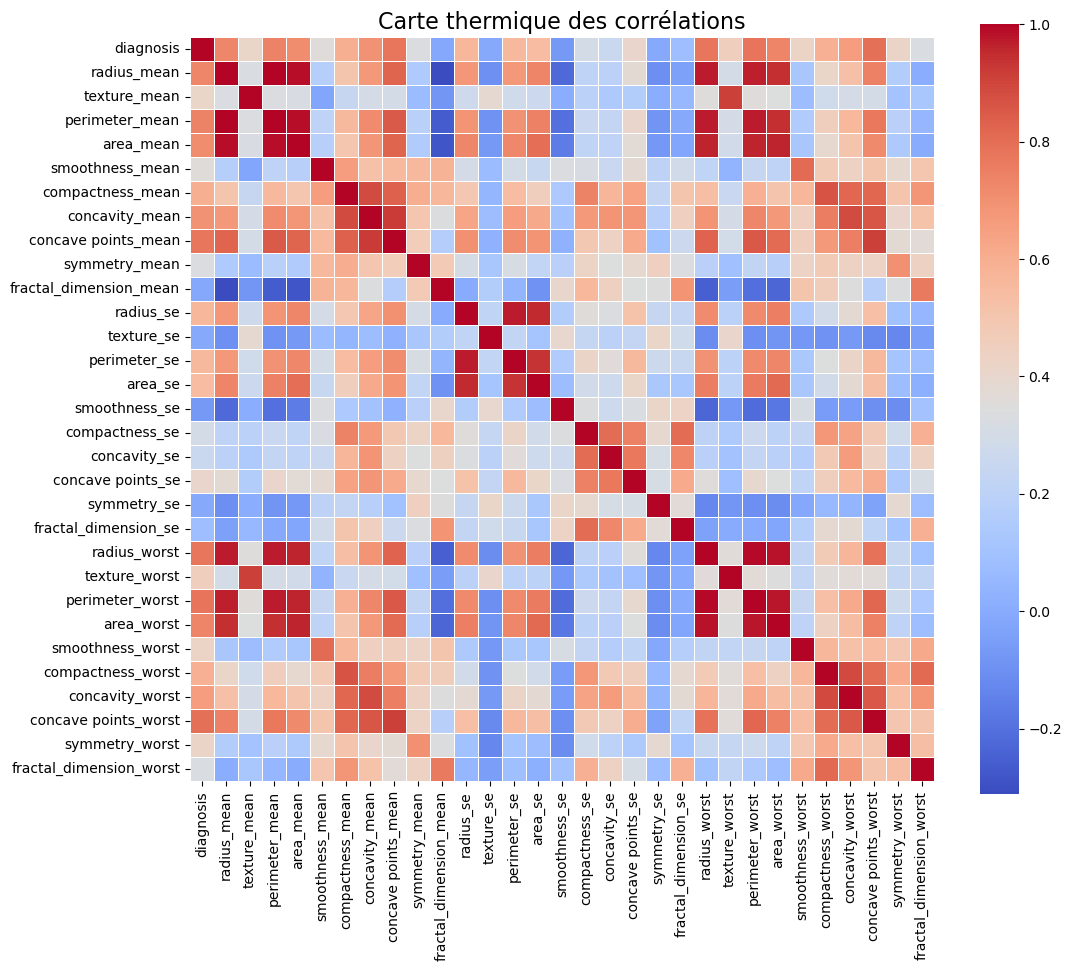

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation des corrélations : Carte thermique
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, cmap='coolwarm', annot=False, cbar=True, square=True, linewidths=0.5)
plt.title("Carte thermique des corrélations", fontsize=16)
plt.show()



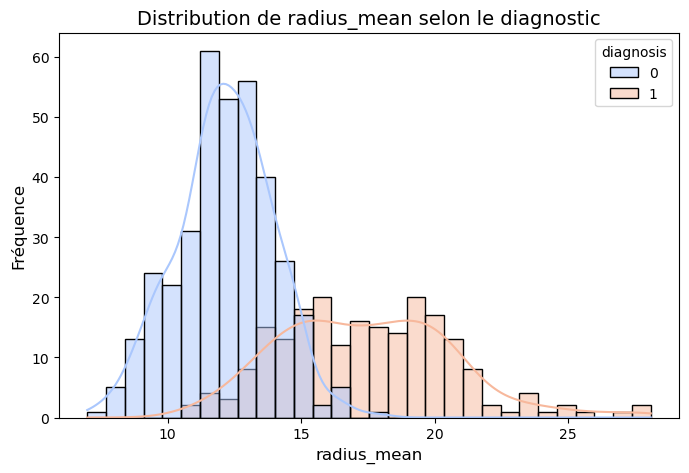

In [6]:
# Distribution de 'radius_mean' selon le diagnostic
plt.figure(figsize=(8, 5))
sns.histplot(data=data_cleaned, x='radius_mean', hue='diagnosis', kde=True, palette="coolwarm", bins=30)
plt.title("Distribution de radius_mean selon le diagnostic", fontsize=14)
plt.xlabel("radius_mean", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.show()

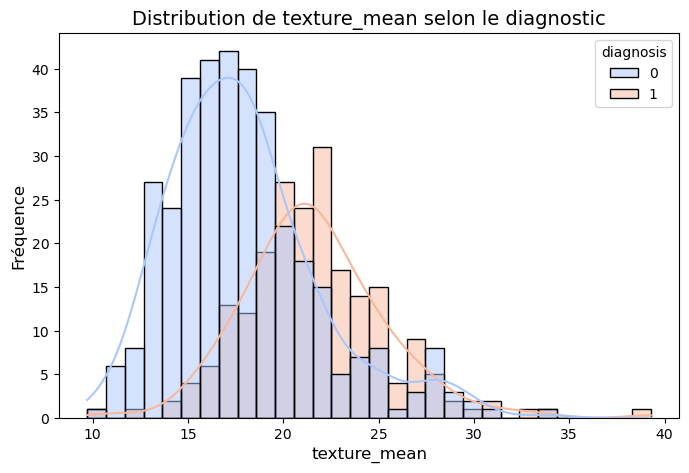

In [7]:
# Distribution de 'texture_mean' selon le diagnostic
plt.figure(figsize=(8, 5))
sns.histplot(data=data_cleaned, x='texture_mean', hue='diagnosis', kde=True, palette="coolwarm", bins=30)
plt.title("Distribution de texture_mean selon le diagnostic", fontsize=14)
plt.xlabel("texture_mean", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.show()

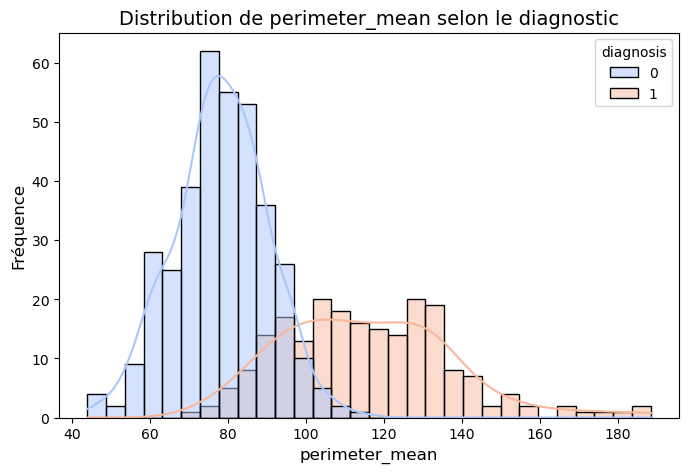

In [8]:
# Distribution de 'perimeter_mean' selon le diagnostic
plt.figure(figsize=(8, 5))
sns.histplot(data=data_cleaned, x='perimeter_mean', hue='diagnosis', kde=True, palette="coolwarm", bins=30)
plt.title("Distribution de perimeter_mean selon le diagnostic", fontsize=14)
plt.xlabel("perimeter_mean", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.show()

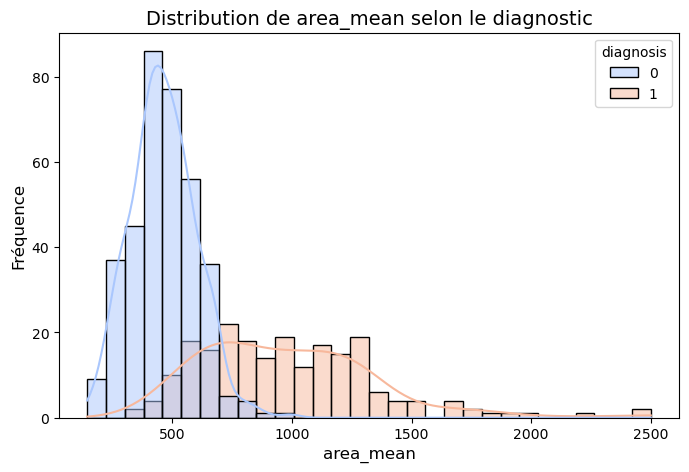

In [9]:
# Distribution de 'area_mean' selon le diagnostic
plt.figure(figsize=(8, 5))
sns.histplot(data=data_cleaned, x='area_mean', hue='diagnosis', kde=True, palette="coolwarm", bins=30)
plt.title("Distribution de area_mean selon le diagnostic", fontsize=14)
plt.xlabel("area_mean", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.show()

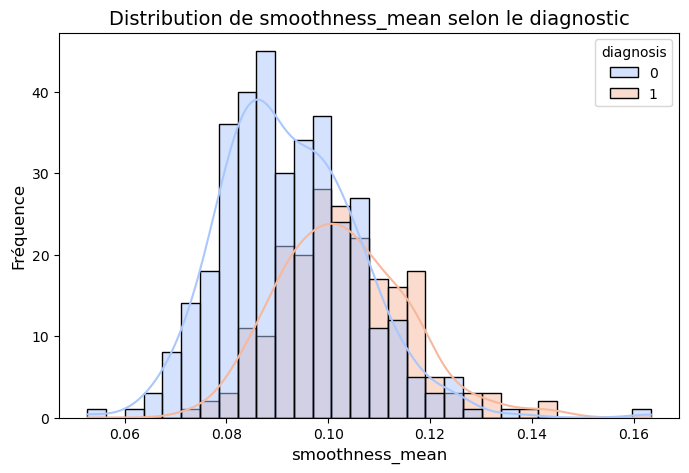

In [10]:
# Distribution de 'smoothness_mean' selon le diagnostic
plt.figure(figsize=(8, 5))
sns.histplot(data=data_cleaned, x='smoothness_mean', hue='diagnosis', kde=True, palette="coolwarm", bins=30)
plt.title("Distribution de smoothness_mean selon le diagnostic", fontsize=14)
plt.xlabel("smoothness_mean", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Séparation des données en variables explicatives (X) et cible (y)
X = data_cleaned.drop(columns=['diagnosis'])
y = data_cleaned['diagnosis']

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraînement d'un modèle de régression logistique
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# Prédictions et évaluation
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Évaluation des performances
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Afficher les résultats
report, conf_matrix, roc_auc

('              precision    recall  f1-score   support\n\n           0       0.96      0.99      0.98       107\n           1       0.98      0.94      0.96        64\n\n    accuracy                           0.97       171\n   macro avg       0.97      0.96      0.97       171\nweighted avg       0.97      0.97      0.97       171\n',
 array([[106,   1],
        [  4,  60]], dtype=int64),
 0.9976635514018691)

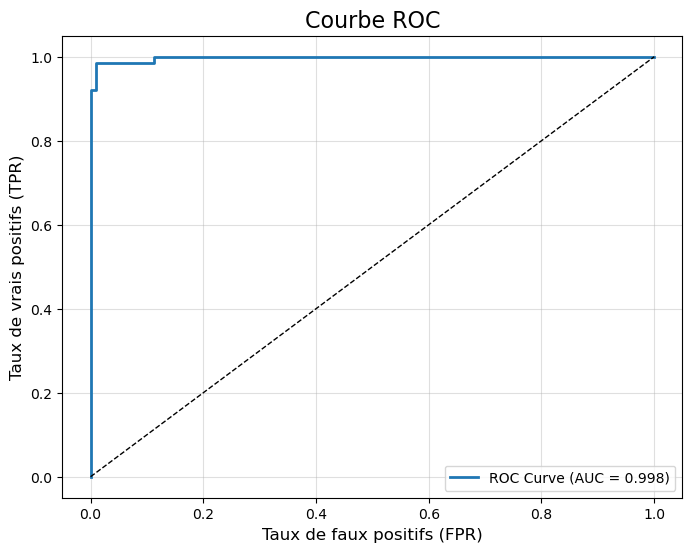

In [12]:
# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)  # Diagonale
plt.title("Courbe ROC", fontsize=16)
plt.xlabel("Taux de faux positifs (FPR)", fontsize=12)
plt.ylabel("Taux de vrais positifs (TPR)", fontsize=12)
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()

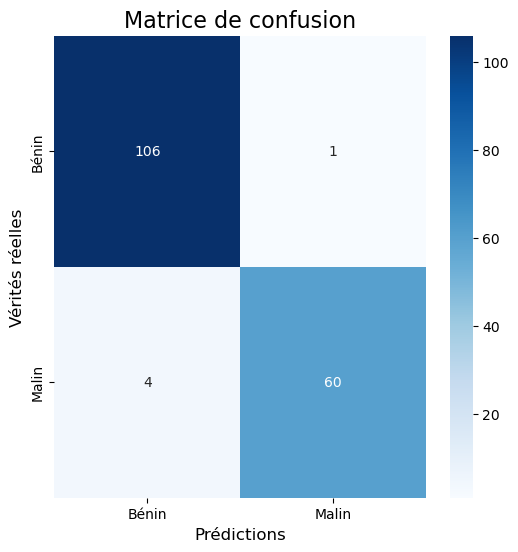

In [13]:
# Matrice de confusion
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Bénin", "Malin"], yticklabels=["Bénin", "Malin"])
plt.title("Matrice de confusion", fontsize=16)
plt.xlabel("Prédictions", fontsize=12)
plt.ylabel("Vérités réelles", fontsize=12)
plt.show()

In [17]:
# résumé des résultats 
results_summary = f"""
### Résultats du Modèle de Régression Logistique

1. **Performances du Modèle** :
   - Précision globale : 97%
   - AUC-ROC : 0.998 (excellente capacité de distinction entre les classes)

2. **Métriques par Classe** :
   - **Classe Bénigne (0)** :
     - Précision : 96%
     - Rappel : 99%
     - F1-score : 98%
   - **Classe Maligne (1)** :
     - Précision : 98%
     - Rappel : 94%
     - F1-score : 96%



4. **Courbe ROC** :
   - Une courbe ROC avec une AUC de 0.998, démontrant une excellente séparation des classes.



"""

# Afficher le résumé
print(results_summary)


### Résultats du Modèle de Régression Logistique

1. **Performances du Modèle** :
   - Précision globale : 97%
   - AUC-ROC : 0.998 (excellente capacité de distinction entre les classes)

2. **Métriques par Classe** :
   - **Classe Bénigne (0)** :
     - Précision : 96%
     - Rappel : 99%
     - F1-score : 98%
   - **Classe Maligne (1)** :
     - Précision : 98%
     - Rappel : 94%
     - F1-score : 96%



4. **Courbe ROC** :
   - Une courbe ROC avec une AUC de 0.998, démontrant une excellente séparation des classes.






In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcul des métriques de performance
mse = mean_squared_error(y_test, y_pred)  # Erreur quadratique moyenne
mae = mean_absolute_error(y_test, y_pred)  # Erreur absolue moyenne
r2 = r2_score(y_test, y_pred)  # Coefficient de détermination R²

# Affichage des résultats
print(f"Erreur quadratique moyenne (MSE) : {mse:.4f}")
print(f"Erreur absolue moyenne (MAE) : {mae:.4f}")
print(f"Coefficient de détermination (R²) : {r2:.4f}")


Erreur quadratique moyenne (MSE) : 0.0292
Erreur absolue moyenne (MAE) : 0.0292
Coefficient de détermination (R²) : 0.8751
